In [24]:
# Import all necessary packages.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sb_utils import save_file

In [25]:
# Import and display the cleaned housing prices data.
# Raw original data source: https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features

house_data = pd.read_csv('house_data_wrangled.csv')
house_data

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,452600.0,83252.0,41.000000,880,129,322,126,37.88,-122.23,5.76,345.81,457.02,41.90,13.20
1,358500.0,83014.0,21.000000,7099,1106,2401,1138,37.86,-122.22,6.35,344.41,455.61,40.42,12.97
2,352100.0,72574.0,26.983847,1467,190,496,177,37.85,-122.24,5.13,344.62,455.79,40.31,11.69
3,341300.0,56431.0,26.983847,1274,235,558,219,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
4,342200.0,38462.0,26.983847,1627,280,565,259,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,78100.0,15603.0,25.000000,1665,374,845,330,39.48,-121.09,100.68,406.71,516.13,154.42,138.33
19671,77100.0,25568.0,18.000000,697,150,356,114,39.49,-121.21,99.70,409.95,519.62,153.39,135.65
19672,92300.0,17000.0,17.000000,2254,485,1007,433,39.43,-121.22,95.54,406.40,516.17,149.24,131.79
19673,84700.0,18672.0,18.000000,1860,409,741,349,39.43,-121.32,94.45,408.68,518.64,148.01,129.20


__Key:__

 - Median house value: Median house value for households within a block
 - Median income (adj): Median income for households within a block of houses (in US dollars)
    - Originally in thousands of US dollars
 - Median age: Median age of a house within a block; a lower number is a newer building
 - Total rooms: Total number of rooms within a block
 - Total bedrooms: Total number of bedrooms within a block
 - Population: Total number of people residing within a block
 - Households: Total number of households, a group of people residing within a home unit, for a block
 - Latitude: A measure of how far north a house is; a higher value is farther north
 - Longitude: A measure of how far west a house is; a higher value is farther west
 - Distance to coast (adj): Distance to the nearest coast point (in miles)
    - Originally in meters
 - Distance to Los Angeles (adj): Distance to the centre of Los Angeles (in miles)
    - Originally in meters
 - Distance to San Diego (adj): Distance to the centre of San Diego (in miles)
    - Originally in meters
 - Distance to San Jose (adj): Distance to the centre of San Jose (in miles)
    - Originally in meters
 - Distance to San Francisco (adj): Distance to the centre of San Francisco (in miles)
    - Originally in meters

In [26]:
# Display summary data of the cleaned data.

house_data.shape

(19675, 14)

In [27]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19675 entries, 0 to 19674
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Median_House_Value            19675 non-null  float64
 1   Median_Income_adj             19675 non-null  float64
 2   Median_Age                    19675 non-null  float64
 3   Tot_Rooms                     19675 non-null  int64  
 4   Tot_Bedrooms                  19675 non-null  int64  
 5   Population                    19675 non-null  int64  
 6   Households                    19675 non-null  int64  
 7   Latitude                      19675 non-null  float64
 8   Longitude                     19675 non-null  float64
 9   Distance_to_coast_adj         19675 non-null  float64
 10  Distance_to_LA_adj            19675 non-null  float64
 11  Distance_to_SanDiego_adj      19675 non-null  float64
 12  Distance_to_SanJose_adj       19675 non-null  float64
 13  D

In [28]:
house_data.describe()

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
count,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.00000
mean,192477.921017,36749.901027,26.983847,2619.763659,539.653113,1440.812198,501.186023,35.651780,-119.563192,26.048491,168.915463,248.443383,217.319406,240.55352
std,97711.509613,15640.327384,11.106738,2181.348207,422.294861,1143.648725,383.264636,2.149802,2.006108,30.964588,154.107660,180.514495,134.703038,155.06982
min,14999.000000,4999.000000,1.000000,2.000000,2.000000,3.000000,2.000000,32.540000,-124.350000,0.070000,0.260000,0.300000,0.350000,0.28000
25%,116600.000000,25268.000000,18.000000,1438.000000,297.000000,796.000000,282.000000,33.930000,-121.760000,6.090000,20.535000,98.730000,73.115000,74.73500
50%,173800.000000,34500.000000,26.983847,2111.000000,436.000000,1179.000000,411.000000,34.270000,-118.500000,13.240000,110.110000,138.700000,284.590000,325.95000
75%,248200.000000,45813.000000,35.000000,3120.000000,648.000000,1746.000000,606.000000,37.730000,-117.990000,33.055000,328.765000,439.795000,321.805000,363.91500
max,500000.000000,131477.000000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,207.420000,632.720000,743.730000,519.940000,561.49000


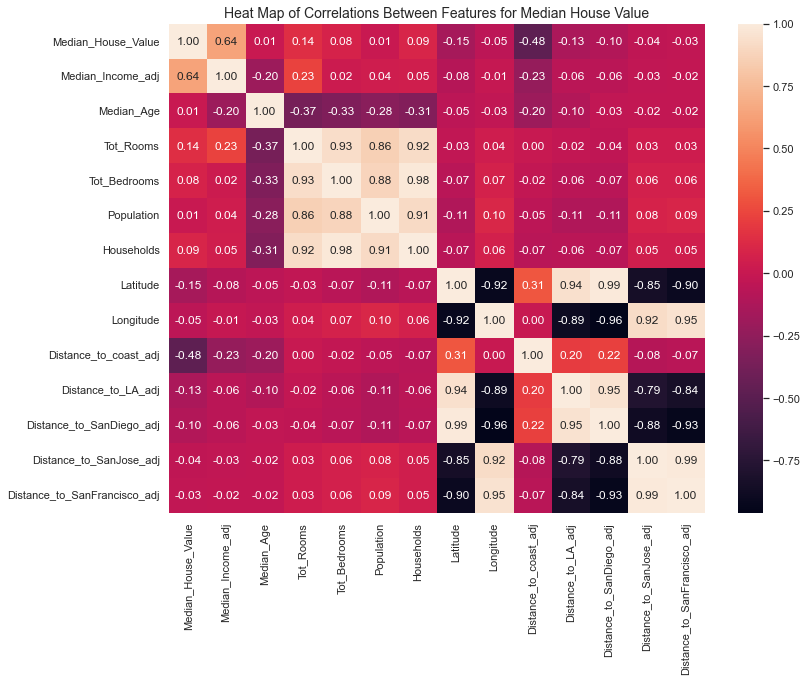

In [30]:
# Create a correlation heat map to check for correlation between fields.

f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(round(house_data.corr(), 2), annot = True, fmt = '.2f')
plt.title('Heat Map of Correlations Between Features for Median House Value', fontsize = 14)
plt.show()

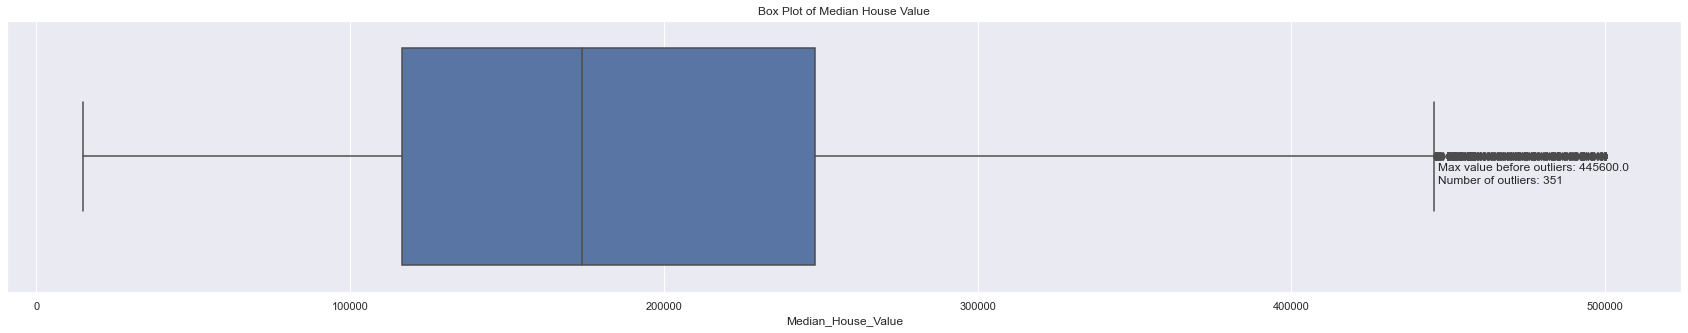

In [32]:
# Check for outliers in the quantitive non-distance fields.

median_house_value_box = sns.boxplot(data = house_data, x = 'Median_House_Value')
median_house_value_box.set_title('Box Plot of Median House Value')
median_house_value_box_max = (np.percentile(house_data['Median_House_Value'], 75) - np.percentile(house_data['Median_House_Value'], 25)) * 1.5 + np.percentile(house_data['Median_House_Value'], 75)
median_house_value_box.annotate('Max value before outliers: ' + str(median_house_value_box_max), xy = (median_house_value_box_max + 1000, .05))
median_house_value_box.annotate('Number of outliers: ' + str(len(house_data[house_data['Median_House_Value'] > median_house_value_box_max])), xy = (median_house_value_box_max + 1000, .1))
sns.set(rc = {"figure.figsize":(30, 5)})

In [33]:
house_data[house_data['Median_House_Value'] > median_house_value_box_max].sort_values(by = 'Median_House_Value')

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
13876,445700.0,74351.0,18.000000,3109,501,949,368,32.83,-117.24,2.42,102.37,9.13,407.46,449.69
6157,445700.0,49583.0,33.000000,2352,373,995,359,34.13,-118.03,27.28,13.36,109.81,309.77,352.03
17205,445900.0,46065.0,22.000000,2781,523,1291,516,37.23,-121.97,18.02,303.24,413.89,8.43,45.30
4596,446000.0,45192.0,26.983847,843,160,333,151,34.06,-118.37,8.34,7.25,116.15,300.44,342.70
5493,446100.0,68317.0,31.000000,5550,881,2465,862,34.16,-118.20,20.10,7.85,116.39,301.65,343.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13860,500000.0,37306.0,34.000000,2392,653,933,619,32.83,-117.28,1.73,101.09,10.49,406.00,448.23
13811,500000.0,43403.0,38.000000,1267,340,442,250,32.77,-117.28,2.56,104.58,7.86,409.25,451.47
16162,500000.0,44000.0,26.983847,2188,361,917,357,37.58,-122.37,4.05,335.87,446.55,31.14,13.82
7996,500000.0,58408.0,26.983847,2208,409,791,408,33.77,-118.14,1.83,20.39,92.23,324.28,366.52


In [34]:
house_data[house_data['Median_House_Value'] > median_house_value_box_max].describe()

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,470381.766382,58060.162393,28.789584,2934.760684,535.586895,1221.424501,500.980057,35.254957,-119.679316,8.114872,142.270256,227.067179,212.689801,235.080000
std,17438.900957,22701.119330,10.254880,2426.450843,394.787723,1008.600212,365.695747,1.850168,2.012918,7.811119,148.909308,169.630983,141.396465,166.867021
min,445700.000000,8804.000000,2.000000,20.000000,5.000000,15.000000,5.000000,32.630000,-122.710000,0.260000,3.270000,1.680000,5.910000,0.550000
25%,453750.000000,39795.000000,25.000000,1671.000000,291.500000,698.500000,280.000000,33.880000,-122.120000,2.225000,14.005000,103.320000,42.910000,27.860000
50%,468800.000000,58408.000000,28.000000,2334.000000,437.000000,962.000000,414.000000,34.140000,-118.430000,5.050000,38.900000,118.320000,298.770000,341.010000
75%,485000.000000,74150.500000,35.000000,3425.000000,665.500000,1536.500000,638.000000,37.485000,-118.125000,11.645000,323.320000,434.005000,313.850000,356.040000
max,500000.000000,131477.000000,51.000000,28258.000000,3864.000000,12203.000000,3701.000000,38.600000,-117.070000,44.240000,363.670000,474.380000,422.240000,464.470000


In [35]:
# Look into blocks with high outliers of median house value but low median income amounts, since it seems strange that low-income areas would have high-value houses.

house_data[(house_data['Median_House_Value'] > median_house_value_box_max)].sort_values(by = 'Median_Income_adj').head(20)

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
4521,450000.0,8804.0,36.000000,369,147,145,136,34.06,-118.31,11.61,3.83,114.10,302.66,344.93
14990,450000.0,8836.0,30.000000,1821,738,1648,684,37.80,-122.41,1.62,348.33,459.28,42.80,2.14
9369,500000.0,12656.0,19.000000,656,200,248,173,36.60,-121.89,2.48,270.58,379.71,50.82,86.41
15003,450000.0,14552.0,26.983847,1185,660,1007,623,37.79,-122.40,0.88,347.45,458.40,41.92,2.04
15152,450000.0,14886.0,26.983847,248,68,124,51,37.76,-122.38,1.42,345.19,456.13,39.65,2.96
8500,450000.0,15132.0,28.000000,1394,582,716,543,34.02,-118.49,0.95,14.28,118.32,298.21,340.42
4183,450000.0,17306.0,28.000000,1759,716,1463,620,34.10,-118.32,12.09,5.47,116.68,300.20,342.46
18595,450000.0,17679.0,39.000000,45,8,22,9,37.63,-120.92,44.24,289.06,400.36,57.10,83.21
4537,475000.0,18214.0,21.000000,3960,1490,3468,1335,34.06,-118.30,12.17,3.27,113.77,303.04,345.30
8717,450000.0,19667.0,2.000000,966,270,233,169,34.42,-118.56,26.69,31.18,142.66,274.54,316.82


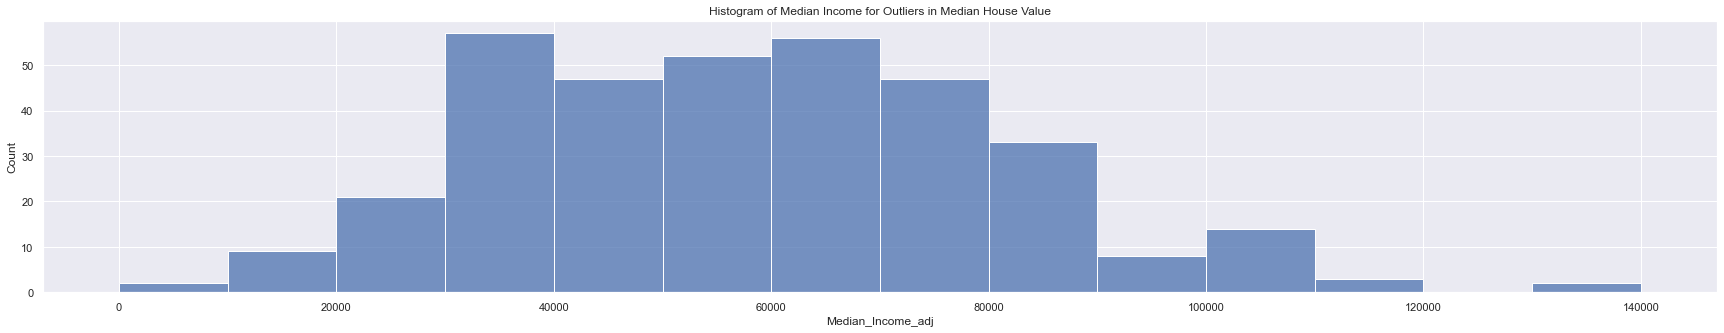

In [36]:
mi_adj_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000]
sns.histplot(data = house_data[(house_data['Median_House_Value'] > median_house_value_box_max)], x = 'Median_Income_adj', bins = mi_adj_bins)
plt.title('Histogram of Median Income for Outliers in Median House Value')
plt.show()

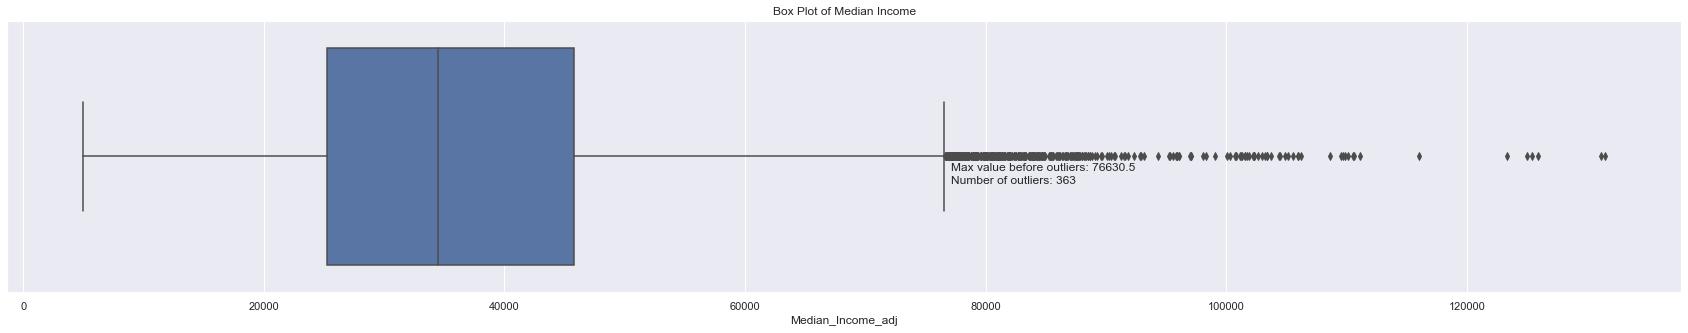

In [37]:
# Continue checking for outliers in the quantitive non-distance fields.

median_income_box = sns.boxplot(data = house_data, x = 'Median_Income_adj')
median_income_box.set_title('Box Plot of Median Income')
median_income_box_max = (np.percentile(house_data['Median_Income_adj'], 75) - np.percentile(house_data['Median_Income_adj'], 25)) * 1.5 + np.percentile(house_data['Median_Income_adj'], 75)
median_income_box.annotate('Max value before outliers: ' + str(median_income_box_max), xy = (median_income_box_max + 500, .05))
median_income_box.annotate('Number of outliers: ' + str(len(house_data[house_data['Median_Income_adj'] > median_income_box_max])), xy = (median_income_box_max + 500, .1))
plt.show()

In [38]:
house_data[house_data['Median_Income_adj'] > median_income_box_max].sort_values(by = 'Median_Income_adj')

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
11317,204800.0,76632.0,28.0,1650,210,557,211,33.95,-117.35,37.99,51.68,85.97,346.02,388.16
16782,426900.0,76659.0,35.0,2189,307,800,320,37.29,-121.92,15.41,304.29,415.12,3.47,43.62
8302,474300.0,76685.0,33.0,2496,387,1098,404,33.88,-118.39,1.51,14.56,107.27,309.34,351.54
10829,319500.0,76709.0,17.0,4461,585,2095,580,33.72,-117.93,7.05,29.17,82.40,334.68,376.95
1598,416500.0,76717.0,26.0,4048,513,1486,498,37.81,-122.12,7.76,338.22,449.46,35.06,17.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,281000.0,125000.0,7.0,120,21,50,27,37.64,-122.48,1.43,343.06,453.69,38.45,9.63
11330,112500.0,125381.0,29.0,124,22,50,18,33.96,-117.44,35.34,46.47,87.46,341.83,384.00
1552,432400.0,125915.0,8.0,452,51,140,43,37.74,-121.92,15.20,327.45,438.77,27.99,28.03
9672,467600.0,131107.0,17.0,1671,192,678,206,33.89,-117.89,15.94,23.16,91.40,327.39,369.67


In [39]:
house_data[house_data['Median_Income_adj'] > median_income_box_max].describe()

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,384350.413223,85794.611570,19.696124,3467.876033,473.509642,1382.619835,454.909091,35.296226,-119.435647,16.899421,149.272424,222.230992,218.971019,245.440826
std,73668.418075,9956.311857,9.924047,3133.189069,424.854368,1318.686235,400.030089,1.920689,2.016185,18.304926,141.092361,171.700794,146.217854,166.048273
min,112500.000000,76632.000000,2.000000,19.000000,3.000000,19.000000,6.000000,32.630000,-122.620000,0.070000,1.460000,2.610000,3.170000,3.020000
25%,349750.000000,79122.500000,13.000000,1860.500000,254.000000,725.500000,257.000000,33.725000,-121.925000,7.480000,31.160000,82.450000,40.890000,38.340000
50%,391300.000000,82375.000000,18.000000,2711.000000,365.000000,1057.000000,365.000000,34.150000,-118.430000,12.420000,49.300000,123.180000,293.480000,335.740000
75%,438500.000000,87749.500000,26.983847,4168.000000,577.000000,1676.000000,560.000000,37.445000,-117.780000,18.165000,315.230000,426.180000,337.455000,379.735000
max,499000.000000,131477.000000,50.000000,30405.000000,4093.000000,12873.000000,3931.000000,39.000000,-116.260000,112.040000,374.500000,484.380000,422.240000,464.470000


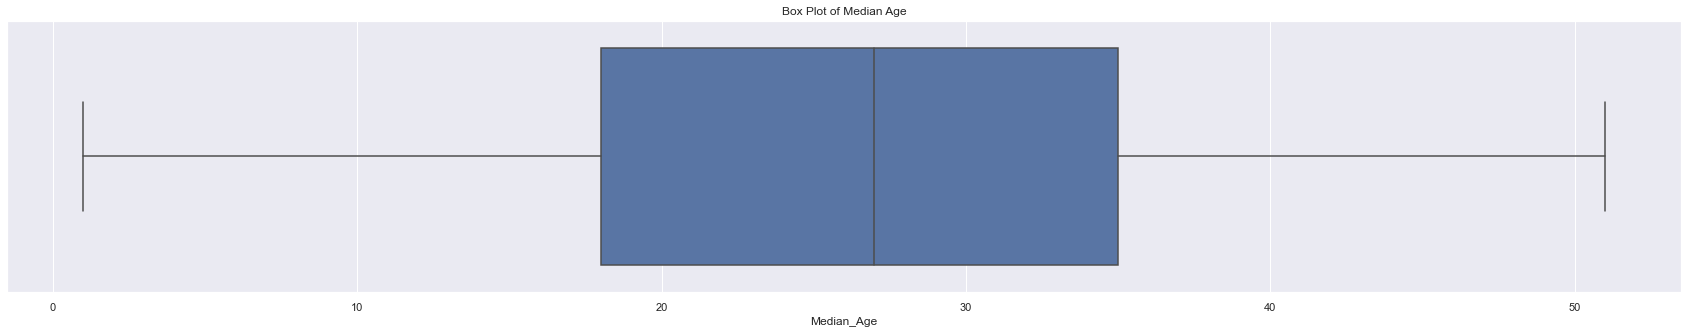

In [40]:
median_age_box = sns.boxplot(data = house_data, x = 'Median_Age')
median_age_box.set_title('Box Plot of Median Age')
plt.show()

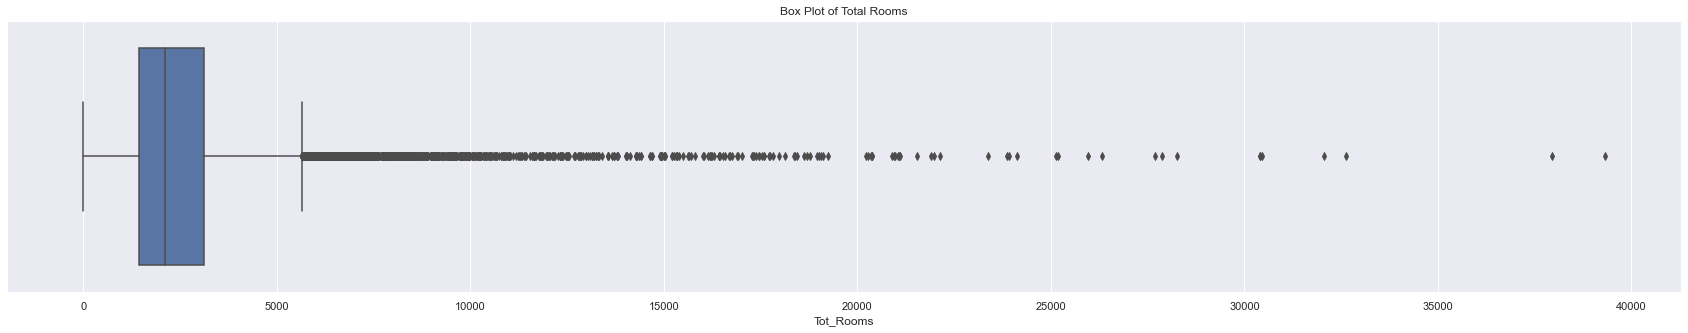

In [41]:
tot_rooms_box = sns.boxplot(data = house_data, x = 'Tot_Rooms')
tot_rooms_box.set_title('Box Plot of Total Rooms')
plt.show()

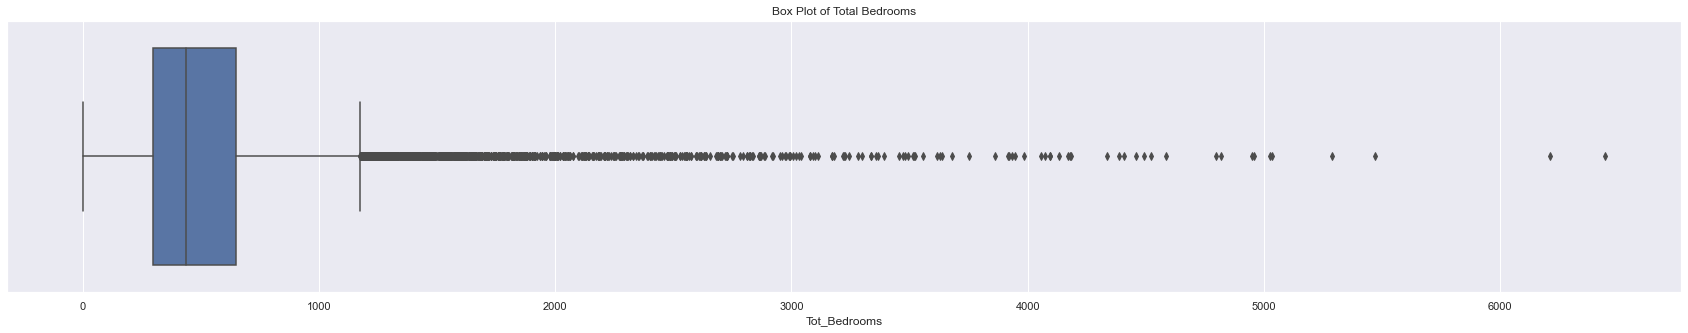

In [42]:
tot_bedrooms_box = sns.boxplot(data = house_data, x = 'Tot_Bedrooms')
tot_bedrooms_box.set_title('Box Plot of Total Bedrooms')
plt.show()

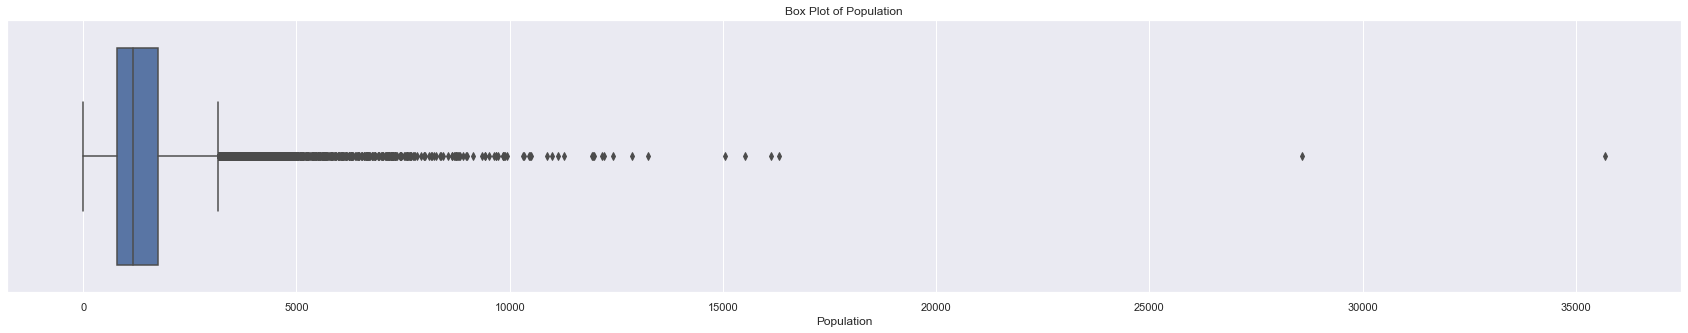

In [43]:
population_box = sns.boxplot(data = house_data, x = 'Population')
population_box.set_title('Box Plot of Population')
plt.show()

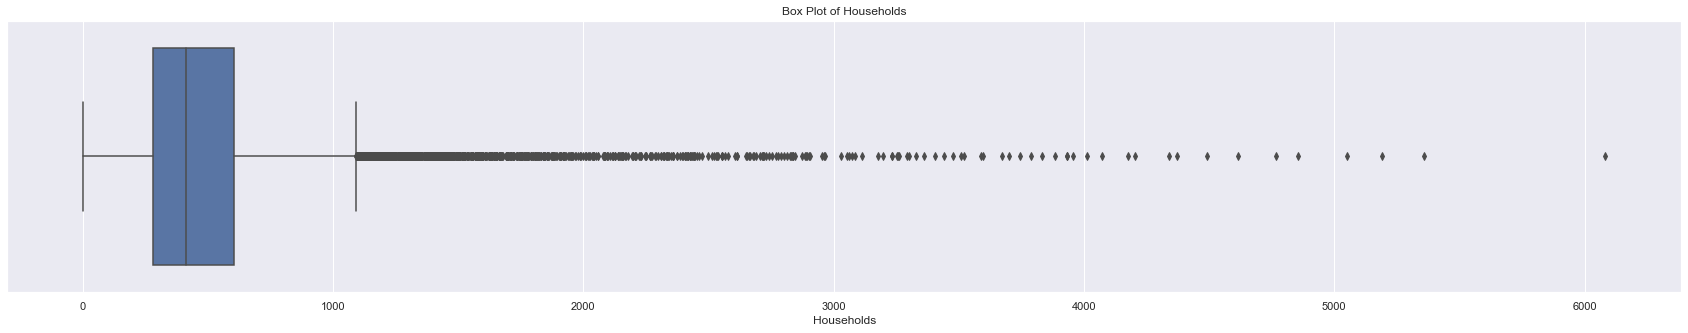

In [44]:
households_box = sns.boxplot(data = house_data, x = 'Households')
households_box.set_title('Box Plot of Households')
plt.show()

__Takeaways of the data, pt. 1:__

 - According to the correlation heat map:
    - The only features significantly correlated with median house value is median income (positively) and potentially distance from the coast (negatively).
    - Total rooms, total bedrooms, population, and number of households are all significantly positively correlated with each other, which makes sense conceptually. However, none of these are significantly correlated with median house value. This also makes sense conceptually because flat population size does not necessarily indicate any level of wealth. __However, population density might - i.e., a lower proportion of people per room, bedroom, or household could indicate higher median house value, since theoretically each person owns more rooms/house.__ It would be nice to have a feature for the total square footage of a block to more accurately determine this.
    - The correlations between the distance features all are significant and make sense - San Jose and San Francisco are near each other, and Los Angeles and San Diego are near each other. When choosing the features for the final model, we should likely only choose one feature at most from each of these pairs.
 - The boxplots of median house value and median income show several hundred high outliers each. Most of these appear to be only technically outliers rather than truly extreme outliers - while they are greater than the outlier threshold determined by [IQR * 1.5 + Q3], most of them aren't much greater than the highest-value records that *aren't* outliers. Therefore, none of these records will be adjusted or removed on this basis.
 - The boxplots of the remaining quantitative fields show thousands of outliers each, but as the blocks are not necessarily equal in size, and provide flat totals of rooms/bedrooms/population rather than density, we cannot take away anything from this.

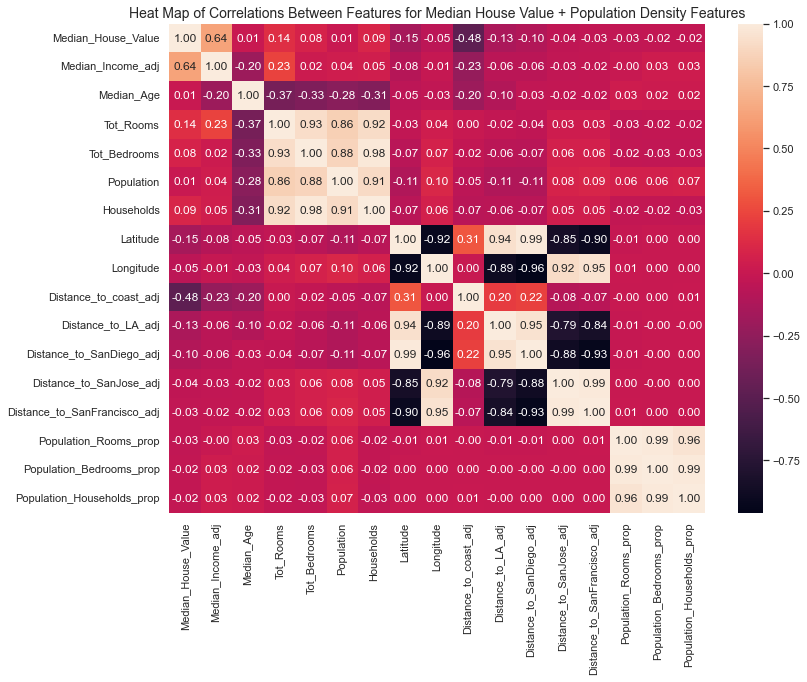

In [45]:
# Create and check correlation of population density features.

house_data_props = house_data.copy()
house_data_props['Population_Rooms_prop'] = house_data_props['Population'] / house_data_props['Tot_Rooms']
house_data_props['Population_Bedrooms_prop'] = house_data_props['Population'] / house_data_props['Tot_Bedrooms']
house_data_props['Population_Households_prop'] = house_data_props['Population'] / house_data_props['Households']

f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(round(house_data_props.corr(), 2), annot = True, fmt = '.2f')
plt.title('Heat Map of Correlations Between Features for Median House Value + Population Density Features', fontsize = 14)
plt.show()

__Takeaways of the data, pt. 2:__

 - According to the new correlation heat map containing the proportion features of population to rooms/bedrooms/households, there is essentially no correlation between these features and median house value, or with any other features.
 - __What else can we consider here?__